# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

#### Метрика
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика RMSE. Ее и нужно реализовать.

In [3]:
def rmse(y_true, y_predicted):
    return np.sqrt(np.mean((y_true - y_predicted) ** 2))


Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

class NormalLR:
    def __init__(self, alpha=1.0, degree=None):
        self.w = None
        self.alpha = alpha
        self.degree = degree
        self.poly = None
    
    def fit(self, X, y):
        if self.degree == None or self.degree == 1:
            X = np.array(X)
            X = np.hstack((np.ones((len(X), 1)), X))
        else:
            self.poly = PolynomialFeatures(degree=self.degree)
            X = self.poly.fit_transform(X)
        n_rows, n_cols = X.shape
        I = np.eye(n_cols)
        I[0, 0] = 0
        self.w = np.linalg.inv((X.T @ X + self.alpha * I)) @ X.T @ y
    
    def predict(self, X):
        if self.degree == None or self.degree == 1:
            X = np.array(X)
            X = np.hstack((np.ones((len(X), 1)), X))
        else:
            X = self.poly.fit_transform(X)
        return X @ self.w

In [5]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(rmse(y_test, regr.predict(X_test)))

0.10388314429104481


1. Выполните загрузку и предобработку файлов x_boston_train и y_boston_train.
2. Разбейте x_boston_train и y_boston_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрику RMSE для моделей LR. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Постройте график зависимости ошибки от коэффициента регуляризации. 

In [7]:
import pandas as pd

def read_data():
    X_train = pd.read_csv("x_boston_train.csv", index_col='Id')
    X_test = pd.read_csv("x_boston_test.csv", index_col='Id')
    
    y_train = pd.read_csv("y_boston_train.csv", index_col='Id')
    y_train = y_train.iloc[:,0]
    
    return X_test, X_train, y_train

In [8]:
X_boston_test, X_boston_train, y_boston_train = read_data()
X_train, X_test, y_train, y_test = train_test_split(X_boston_train, y_boston_train, train_size=0.8, random_state=42)

In [9]:
# default RidgeRegressor without data preprocessing
regr = NormalLR()
regr.fit(X_train, y_train)
print(rmse(y_test, regr.predict(X_test)))
print(rmse(y_train, regr.predict(X_train)))

5109.370461206057
4648.604842225422


### EDA

In [10]:
X_boston_train.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
Id,,,,,,,,,,,,,
0,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666.0,20.2,334.40,14.13
1,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437.0,21.2,385.76,11.12
2,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666.0,20.2,272.21,16.23
3,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432.0,17.8,388.74,10.45
4,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300.0,15.3,394.72,8.23


In [11]:
X_boston_train.describe() # no NAs or categorical data which needs to be encoded, but data needs to be scaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.779689,11.266089,11.244158,0.061881,0.555123,6.294693,68.874752,3.732200,9.735149,410.881188,18.393564,357.854332,12.619926
std,8.703271,23.064407,6.870426,0.241238,0.115695,0.729084,28.024408,2.077102,8.793842,169.448970,2.162197,88.550638,7.257038
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079980,0.000000,5.175000,0.000000,0.449000,5.886500,45.325000,2.077100,4.000000,279.000000,16.975000,375.085000,6.907500
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.211500,77.700000,3.142300,5.000000,336.000000,19.000000,391.395000,11.170000
75%,3.840055,12.500000,18.100000,0.000000,0.624000,6.631250,94.025000,5.117025,24.000000,666.000000,20.200000,396.900000,16.977500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


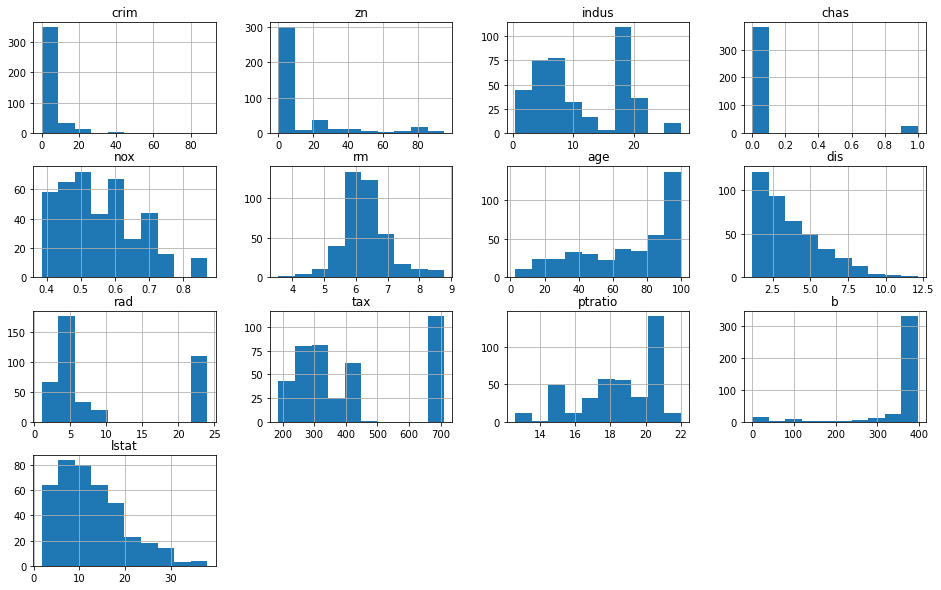

In [12]:
X_boston_train.hist(figsize=(16,10))
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# the best choice is StandardScaler
stdscaler = StandardScaler()

X_train_scaled = stdscaler.fit_transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

In [14]:
regr = NormalLR()
regr.fit(X_train_scaled, y_train)
print(f"RMSE for scaled data: {rmse(y_test, regr.predict(X_test_scaled))}")

RMSE for scaled data: 5056.235424739851


In [15]:
# let's scale our data
X_boston_train_scaled = stdscaler.fit_transform(X_boston_train)
X_boston_test_scaled = stdscaler.transform(X_boston_test)

### CV alpha optimization

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(len(X_boston_train_scaled), shuffle=True, random_state=42)
degree_list = [3]
alpha_list = [2 ** i for i in range(-10, 10)]
best_alpha = None
best_degree = None
best_score = 10 ** 5

for degree in degree_list:
    for alpha in alpha_list:
        score = 0
        for train_idx, test_idx in kf.split(X_boston_train_scaled):
            ridge = NormalLR(alpha=alpha, degree=degree)
            ridge.fit(X_boston_train_scaled[train_idx, :], y_boston_train[train_idx])
            y_pred = ridge.predict(X_boston_train_scaled[test_idx, :])
            score += rmse(y_boston_train[test_idx], y_pred)
        score /= kf.get_n_splits()
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_degree = degree

print("Results of CV for RidgePolyRegression:\n")
print(f"Best degree is: {best_degree}")
print(f"Best alpha is: {best_alpha}")
print(f"Best CV RMSE is: {best_score}")

best_ridge = NormalLR(alpha=best_alpha, degree=best_degree)
best_ridge.fit(X_train_scaled, y_train)
y_pred = best_ridge.predict(X_test_scaled)
print(f"Best_ridge RMSE on test data is: {rmse(y_test, y_pred)}")

### Plotting RMSE w.r.t. alpha

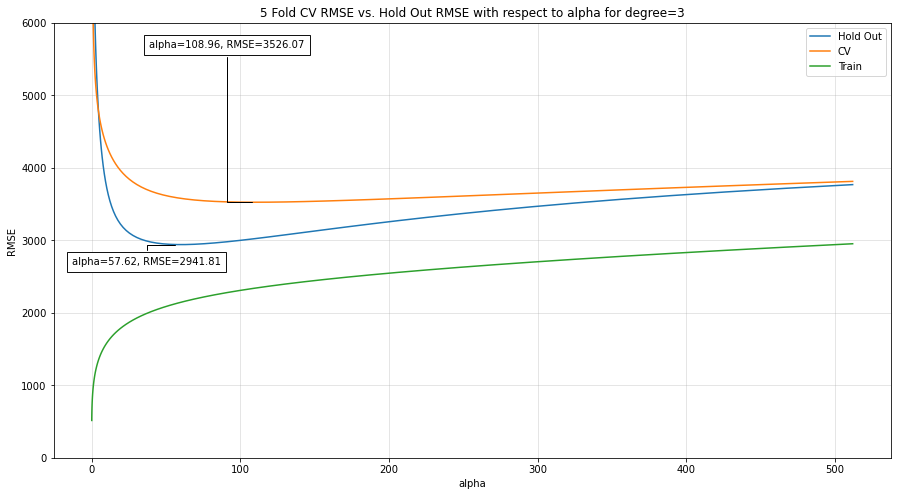

In [58]:
# alphas
x = np.logspace(-4, 9, num=100, base=2)
# Train RMSEs
y_fit = []
# CV RMSEs
y_cv = []
# Test RMSEs
y = []

kf = KFold(10, shuffle=True, random_state=42)

for alpha in x:
    regr = NormalLR(alpha, degree=3)
    regr.fit(X_train_scaled, y_train)
    y_pred = regr.predict(X_test_scaled)
    # test rmse
    y.append(rmse(y_test, y_pred))
    # train rmse
    y_fit.append(rmse(y_train, regr.predict(X_train_scaled)))
    
    # cv rmse
    score = 0
    for train_idx, test_idx in kf.split(X_boston_train_scaled):
        regr = NormalLR(alpha=alpha, degree=3)
        regr.fit(X_boston_train_scaled[train_idx, :], y_boston_train[train_idx])
        y_pred = regr.predict(X_boston_train_scaled[test_idx, :])
        score += rmse(y_boston_train[test_idx], y_pred)
    y_cv.append(score / kf.get_n_splits())
    
y_fit = np.array(y_fit)
y_cv = np.array(y_cv)
y = np.array(y)

# min point CV
xmin_cv = x[np.argmin(y_cv)]
ymin_cv = y_cv.min()

# min point Test
xmin_test = x[np.argmin(y)]
ymin_test = y.min()

# annotation with min point
text_test = "alpha={:.2f}, RMSE={:.2f}".format(xmin_test, ymin_test)
text_cv = "alpha={:.2f}, RMSE={:.2f}".format(xmin_cv, ymin_cv)
bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.92)
arrowprops = dict(arrowstyle="-", connectionstyle="angle, angleA=90")
kw = dict(xycoords='data', textcoords="axes fraction", arrowprops=arrowprops, 
          bbox=bbox_props, ha="right", va="center")

# creating plots with annotations
plt.figure(figsize=(15,8))

plt.plot(x, y)
plt.annotate(text_test, xy=(xmin_test, ymin_test), xytext=(0.20,0.45), **kw)

plt.plot(x, y_cv)
plt.annotate(text_cv, xy=(xmin_cv, ymin_cv), xytext=(0.30,0.95), **kw)

plt.plot(x, y_fit)

# prettify
plt.grid(alpha=0.4)
plt.ylim(0, 6000)
plt.legend(["Hold Out", "CV", "Train"])
plt.title("5 Fold CV RMSE vs. Hold Out RMSE with respect to alpha for degree=3")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

Обучите модель на всех данных из x_boston_train и y_boston_train.
Сделайте submit своего решения и получите значение RMSE_score не более 5000

In [18]:
best_ridge.fit(X_boston_train_scaled, y_boston_train)
y_best_pred = best_ridge.predict(X_boston_test_scaled)

In [ ]:
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = X_boston_test.index
submission["Expected"] = y_best_pred
submission.to_csv('submission.csv', index=False)